In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
import os


In [33]:
# Read the csv file into a pandas DataFrame
dfs = pd.read_csv('source_data/lumab_stab_scrubbed.csv')


In [34]:
dfs.head()

,TIMEPOINT,NAME,ENTRY,CONDITION,PRODUCT,Sample-Number,Lot
0,06M,Deamidation,3.675000,5C,Lumab,21573,39360
1,09M,Deamidation,3.465000,5C,Lumab,21575,39360
2,12M,Deamidation,4.515000,5C,Lumab,21578,39360
3,24M,Deamidation,3.826734,5C,Lumab,95206,39404
4,24M,Deamidation,4.192381,5C,Lumab,95209,39408


In [35]:
# Data Cleaning

data1= dfs.drop(columns=[ "NAME", "PRODUCT", "Sample-Number"], axis=1)
# drop unnamed column

#data1=data1.drop(data1.columns[0], axis=1)
# strip < from entry
#data1['ENTRY'] = data1['ENTRY'].str.replace('<', '')
data1.fillna(value=0, inplace=True)

In [36]:
data1.head()

,TIMEPOINT,ENTRY,CONDITION,Lot
0,06M,3.675000,5C,39360
1,09M,3.465000,5C,39360
2,12M,4.515000,5C,39360
3,24M,3.826734,5C,39404
4,24M,4.192381,5C,39408


In [37]:
#removed / and alphabet
data1.replace(r'/\w+',value="",inplace=True,regex=True)
data1['Lot'].replace(r'[A-Z,a-z]+',value="",inplace=True,regex=True)

In [38]:
# convert to integer and round to 1 decimal place
data1["ENTRY"] = pd.to_numeric(data1["ENTRY"])
data1["ENTRY"] = data1["ENTRY"].round(1)

In [39]:
#### testing ###
data1['TIMEPOINT'] = data1['TIMEPOINT'].str.replace('M', '').astype(int)

In [40]:
# Recoding the two conditions to 1's and 0's
data1['CONDITION'] = [ 1 if x == '5C' else 0 for x in dfs['CONDITION']]

In [41]:
# use bins to create category
entry_bins = [-1, 0, 1, 2, 3, 4, 5, 6, 8]
group_names = ["S0", "S1", "S2", "S3","S4", "S5", "S6", "S7"]

# Categorize the deamidiation measurement using entry_bins
data1["ENTRY"] = pd.cut(data1["ENTRY"], entry_bins, labels=group_names)

In [42]:
data1.head()

,TIMEPOINT,ENTRY,CONDITION,Lot
0,6,S4,1,39360
1,9,S4,1,39360
2,12,S5,1,39360
3,24,S4,1,39404
4,24,S5,1,39408


In [43]:
target = data1["ENTRY"]
# target_names = ["higher", "lower"]

In [44]:
data = data1.drop("ENTRY", axis=1)
feature_names = data.columns
data.head()

,TIMEPOINT,CONDITION,Lot
0,6,1,39360
1,9,1,39360
2,12,1,39360
3,24,1,39404
4,24,1,39408


In [45]:
data.dtypes

TIMEPOINT     int32
CONDITION     int64
Lot          object
dtype: object

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

k: 1, Train/Test Score: 0.958/0.570
k: 2, Train/Test Score: 0.763/0.519
k: 3, Train/Test Score: 0.775/0.544
k: 4, Train/Test Score: 0.733/0.544
k: 5, Train/Test Score: 0.691/0.544
k: 6, Train/Test Score: 0.665/0.608
k: 7, Train/Test Score: 0.661/0.544
k: 8, Train/Test Score: 0.644/0.570
k: 9, Train/Test Score: 0.640/0.582


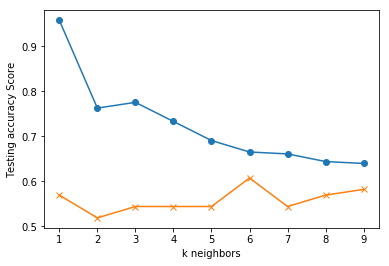

In [47]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []

for k in range(1, 10, 1):
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='ball_tree')
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

plt.plot(range(1, 10, 1), train_scores, marker='o')
plt.plot(range(1, 10, 1), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
# Save Figure
plt.savefig("images/Knn_entry.png")
plt.show()



In [48]:
# Note that k: 7 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print('k=1 Test Acc: %.3f' % knn.score(X_test, y_test))

k=1 Test Acc: 0.532


In [49]:
new_data = [[3,2,39368]]
predicted_class = knn.predict(new_data)
print(predicted_class)

['S4']
